
# Project:  TMDB 5000 Movie Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

>How we can make a comparison between movie genres and know what is the most popular than other, what is the comparison between the profit of movies genres. Here we have a dataset to investigate "TMDb Movie Database" a dataset of about 5000 movies, here we can answer questions as;

> 1-Creat a box plot to describe the runtime of this movie.
>
> 2-What is the rate of some movie Genres over years?
>
> 3-What is the rate of top 10 directors?
>
> 4-What is the rate of movie genres?
>
> 5-What is the Most Profitable Movie Genre?
>
> 6-What are the Movies with Highest Vote Average?

In [1]:
#import packages 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling
### General Properties
>Loading data
>
>Explore the error
>
>solution the error


In [6]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
# load the data (tmdb-movies.csv).
df = pd.read_csv('D:\\Courses\\data science\\project_2\\tmdb-movies.csv')
df.head(1)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09


In [7]:
# assess the data to note the mistakes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [8]:
df[df.duplicated()]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2090,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0


In [9]:
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

### Data Cleaning (drop duplicates, make types as similar, drop missing values, correction some error)


In [10]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.

#drop duplicate row and check
df.drop_duplicates(inplace = True)
df.duplicated().sum()

0

In [11]:
#convert id column to string
#convert budget, revenue column to float and check
df['id'] = df['id'].apply(str)
df['budget'] = df['budget'].apply(float)
df['revenue'] = df['revenue'].apply(float)
df.dtypes

id                       object
imdb_id                  object
popularity              float64
budget                  float64
revenue                 float64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

In [12]:
#drop missing values
#drop columns (homepage,tagline, keywords)
#drop rows (production_companies, director, cast)

df = df.drop(['homepage','tagline','keywords'], axis='columns')
df = df.dropna(subset=['production_companies', 'director', 'cast', 'genres'])

In [13]:
df.isnull().sum()

id                      0
imdb_id                 2
popularity              0
budget                  0
revenue                 0
original_title          0
cast                    0
director                0
overview                0
runtime                 0
genres                  0
production_companies    0
release_date            0
vote_count              0
vote_average            0
release_year            0
budget_adj              0
revenue_adj             0
dtype: int64

In [14]:
df.shape

(9772, 18)

In [15]:
#correct the mistake in runtime
#https://stackoverflow.com/questions/46168450/replace-a-specific-range-of-values-in-a-pandas-dataframe
df['runtime'] = df['runtime'].mask(df['runtime'] < 50,df['runtime'].mean())
df['runtime'] = df['runtime'].mask(df['runtime'] > 200,df['runtime'].mean())


In [16]:
#correct the error in  budget, revenue, budget_adj, revenue_adj
#replace budget, revenue, budget_adj, revenue_adj
df['budget'] = df['budget'].mask(df['budget'] <= 0,df['budget'].mean())
df['revenue'] = df['revenue'].mask(df['revenue'] <= 0,df['revenue'].mean())
df['budget_adj'] = df['budget_adj'].mask(df['budget_adj'] <= 0,df['budget_adj'].mean())
df['revenue_adj'] = df['revenue_adj'].mask(df['revenue_adj'] <= 0,df['revenue_adj'].mean())

In [17]:
df.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,9772.000000,9.772000e+03,9.772000e+03,9772.00000,9772.000000,9772.000000,9772.000000,9.772000e+03,9.772000e+03
mean,0.694721,2.404598e+07,6.696239e+07,103.48276,239.312014,5.963528,2000.878428,2.885575e+07,8.637367e+07
std,1.036931,2.912660e+07,1.162142e+08,18.26616,603.011504,0.913174,13.036794,3.161753e+07,1.428436e+08
min,0.000188,1.000000e+00,2.000000e+00,51.00000,10.000000,1.500000,1960.000000,9.210911e-01,2.370705e+00
25%,0.232710,1.617967e+07,3.526309e+07,91.00000,18.000000,5.400000,1994.000000,1.941599e+07,4.908911e+07
50%,0.419762,1.617967e+07,4.423121e+07,100.00000,46.000000,6.000000,2005.000000,1.941599e+07,5.705309e+07
75%,0.776408,1.928750e+07,4.423121e+07,112.00000,173.000000,6.600000,2011.000000,2.464268e+07,5.705309e+07
max,32.985763,4.250000e+08,2.781506e+09,200.00000,9767.000000,8.700000,2015.000000,4.250000e+08,2.827124e+09


<a id='eda'></a>
## Exploratory Data Analysis

>Now, we have trimmed and cleaned data, we are ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that we posted in the Introduction section..


array([[<AxesSubplot:title={'center':'popularity'}>,
        <AxesSubplot:title={'center':'budget'}>,
        <AxesSubplot:title={'center':'revenue'}>],
       [<AxesSubplot:title={'center':'runtime'}>,
        <AxesSubplot:title={'center':'vote_count'}>,
        <AxesSubplot:title={'center':'vote_average'}>],
       [<AxesSubplot:title={'center':'release_year'}>,
        <AxesSubplot:title={'center':'budget_adj'}>,
        <AxesSubplot:title={'center':'revenue_adj'}>]], dtype=object)

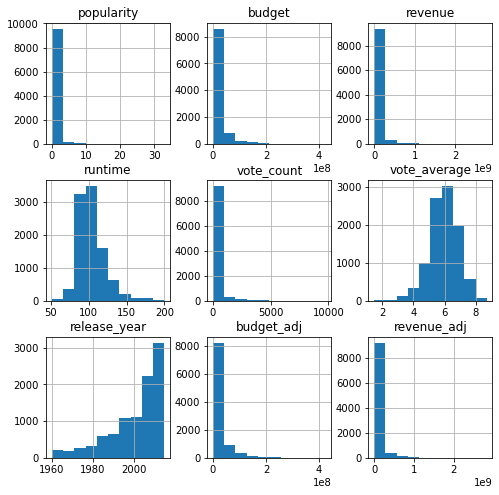

In [18]:
df.hist(figsize=(8,8))

### Question 1. Discription The mean of runtime by box plote

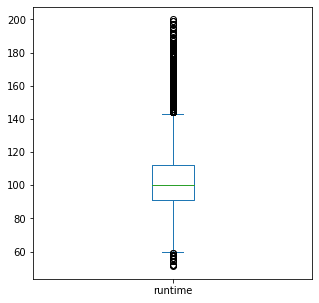

In [19]:
#Description of run time
df['runtime'].plot(kind='box', figsize =(5,5));

### Question 2. What is the rate of some movie Genres over years?

IndexError: index 0 is out of bounds for axis 0 with size 0

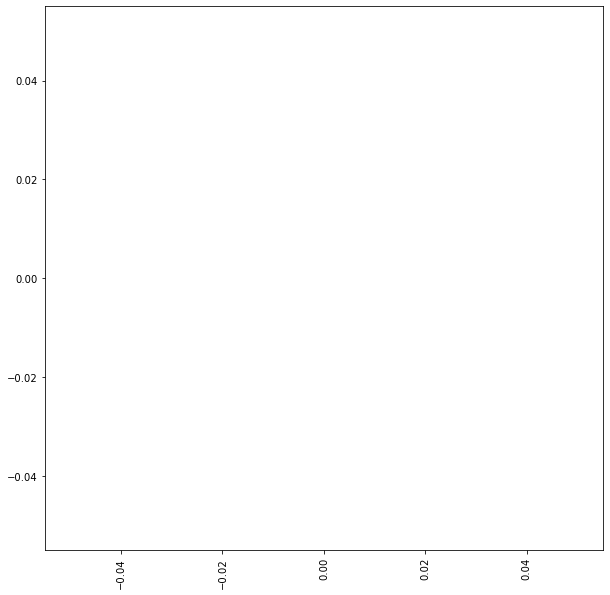

In [20]:
# the Rate of all movies contain action genre
#https://stackoverflow.com/questions/11350770/select-by-partial-string-from-a-pandas-dataframe
action = df[df['genres'].str.contains("Darma")]['release_year'].value_counts(ascending=True)
action.plot(kind = 'bar',figsize=(10,10))
plt.xlabel('Year', fontsize = 14)
plt.ylabel('Movie_count', fontsize= 14)
plt.title('action Over Years', fontsize=16)

Text(0.5, 1.0, 'Family Over Years')

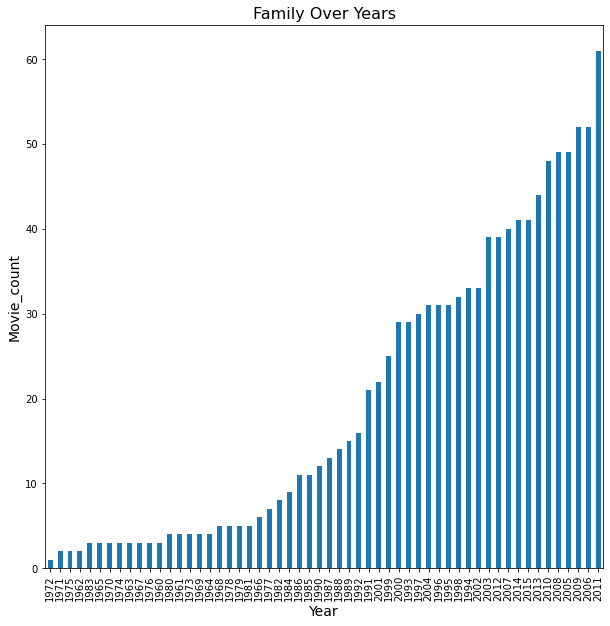

In [21]:
# the Rate of all movies contain Family genre
Family = df[df['genres'].str.contains("Family")]['release_year'].value_counts(ascending=True)
Family.plot(kind = 'bar',figsize=(10,10))
plt.xlabel('Year', fontsize = 14)
plt.ylabel('Movie_count', fontsize= 14)
plt.title('Family Over Years', fontsize=16)

Text(0.5, 1.0, 'Crime Over Years')

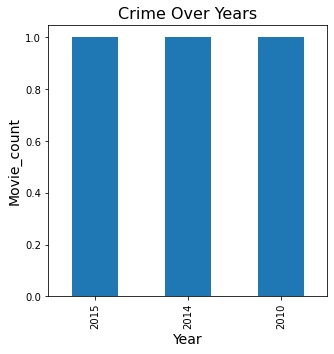

In [22]:
# the Rate of Crime Movies only
crime = df.query('genres == "Crime"')['release_year'].value_counts()
crime.plot(kind = 'bar',figsize=(5,5))
plt.xlabel('Year', fontsize = 14)
plt.ylabel('Movie_count', fontsize= 14)
plt.title('Crime Over Years', fontsize=16)

Text(0.5, 1.0, 'Romance Over Years')

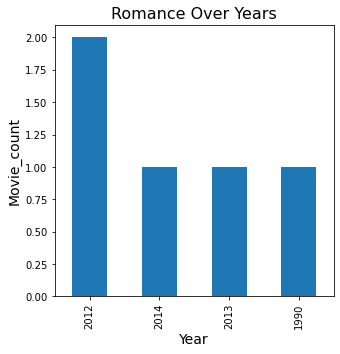

In [23]:
# the Rate of Romance Movies only
Romance = df.query('genres == "Romance"')['release_year'].value_counts()
Romance.plot(kind = 'bar',figsize=(5,5))
plt.xlabel('Year', fontsize = 14)
plt.ylabel('Movie_count', fontsize= 14)
plt.title('Romance Over Years', fontsize=16)

Text(0.5, 1.0, 'Animation Over Years')

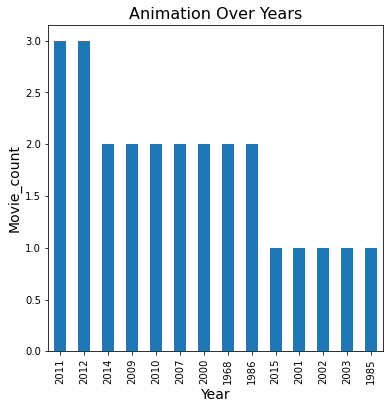

In [24]:
# the Rate of Animation Movies only
animation = df.query('genres == "Animation"')['release_year'].value_counts()
animation.plot(kind = 'bar',figsize=(6,6))
plt.xlabel('Year', fontsize = 14)
plt.ylabel('Movie_count', fontsize= 14)
plt.title('Animation Over Years', fontsize=16)

### Question 4. What is the rate of top 10 directors?

In [25]:
df_dir = df['director'].value_counts()

In [26]:
df_dir.nlargest(10)

Woody Allen          42
Clint Eastwood       34
Steven Spielberg     29
Martin Scorsese      26
Ridley Scott         23
Steven Soderbergh    22
Ron Howard           22
Joel Schumacher      21
Brian De Palma       20
Barry Levinson       19
Name: director, dtype: int64

Text(0.5, 1.0, 'Top 10 director')

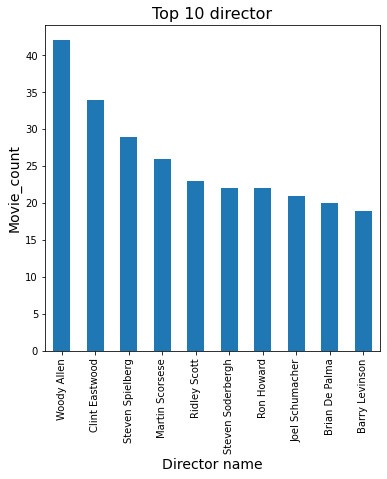

In [27]:
# The rate of top 10 Director
#https://pandas.pydata.org/pandas-docs/version/0.17.0/generated/pandas.DataFrame.nlargest.html
director = df_dir.nlargest(10)
director.plot(kind = 'bar',figsize=(6,6))
plt.xlabel('Director name', fontsize = 14)
plt.ylabel('Movie_count', fontsize= 14)
plt.title('Top 10 director', fontsize=16)

### Question 4. What is the rate of movie genres?

In [28]:
#set id column as index
df = df.set_index('id')
df.head()

,imdb_id,popularity,budget,revenue,original_title,cast,director,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
id,,,,,,,,,,,,,,,,,
135397,tt0369610,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Twenty-two years after the events of Jurassic ...,124.0,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
76341,tt1392190,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,An apocalyptic story set in the furthest reach...,120.0,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
262500,tt2908446,13.112507,110000000.0,2.952382e+08,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,Beatrice Prior must confront her inner demons ...,119.0,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
140607,tt2488496,11.173104,200000000.0,2.068178e+09,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Thirty years after defeating the Galactic Empi...,136.0,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
168259,tt2820852,9.335014,190000000.0,1.506249e+09,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Deckard Shaw seeks revenge against Dominic Tor...,137.0,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [29]:
#Split the genres
genres_df = df['genres'].str.split("|", expand=True)

# Verifying successful separation 
genres_df.head(3)

,0,1,2,3,4
id,,,,,
135397,Action,Adventure,Science Fiction,Thriller,None
76341,Action,Adventure,Science Fiction,Thriller,None
262500,Adventure,Science Fiction,Thriller,None,None


In [30]:
# Creating a separate dataframe form unique genres records.
genres_df = genres_df.stack()
genres_df = pd.DataFrame(genres_df)

# Verifying successful separation 
genres_df.head()

0
id                       
135397 0           Action
       1        Adventure
       2  Science Fiction
       3         Thriller
76341  0           Action

In [31]:
#rename the column
genres_df.rename(columns = {0:'genres_adj'},inplace= True)

# Verifying successful separation 
genres_df.head()

genres_adj
id                       
135397 0           Action
       1        Adventure
       2  Science Fiction
       3         Thriller
76341  0           Action

In [32]:
#count of Movie genres
genres_df.genres_adj.value_counts()

Drama              4364
Comedy             3433
Thriller           2746
Action             2235
Romance            1570
Horror             1526
Adventure          1384
Crime              1299
Science Fiction    1136
Family             1095
Fantasy             840
Mystery             773
Animation           617
Music               339
Documentary         317
History             306
War                 258
Western             160
TV Movie            132
Foreign             120
Name: genres_adj, dtype: int64

Text(0.5, 1.0, 'difference between Movie Genres')

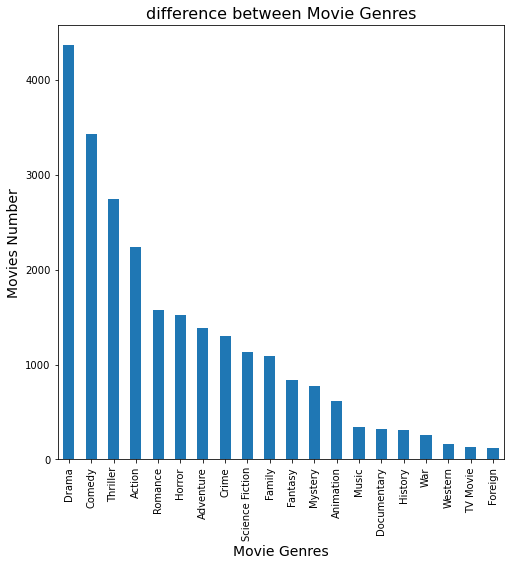

In [33]:
# Geting the difference frequence genres
genres_df.genres_adj.value_counts().plot(kind='bar' , figsize=(8,8))
plt.xlabel('Movie Genres', fontsize=14)
plt.ylabel('Movies Number', fontsize=14)
plt.title('difference between Movie Genres', fontsize=16)


### Question 6.What is the Most Profitable Movie Genre?


In [34]:
#https://www.kaggle.com/ramyheshmat/project-investigate-a-dataset-tmdb
# function to get data and concatenating it to one of the dataset properties classification
# Here we need to split movie genres and connecting each genre with its related data
def get_data(data, column):
    data = data[column].str.cat(sep = '|')
    data = pd.Series(data.split('|')).str.strip()
    data_counts = data.value_counts(ascending=True)
    return data_counts

Text(0.5, 1.0, 'Most Profitable Movie Genres')

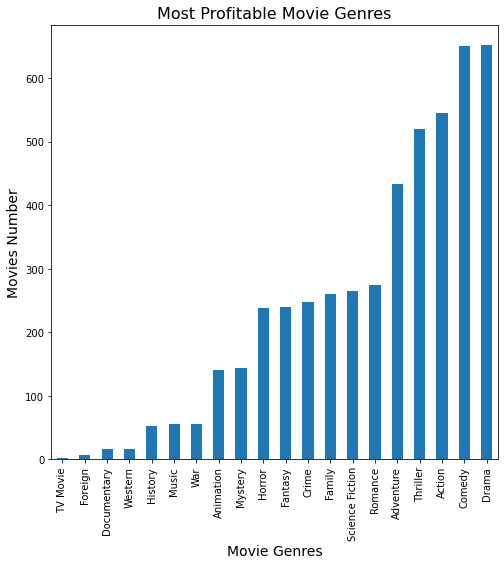

In [35]:
# getting the highest profit data and connecting them to its related movie genre
df['profit'] = df.revenue - df.budget
highest_profit = df[df.profit > df.profit.mean()]
movie_genre = get_data(highest_profit,'genres')
movie_genre.plot(kind='bar', figsize=(8,8))
plt.xlabel('Movie Genres', fontsize=14)
plt.ylabel('Movies Number', fontsize=14)
plt.title('Most Profitable Movie Genres', fontsize=16)

### Question 6.What are the Movies with Highest Vote Average?


Text(0.5, 1.0, 'Movies with Highest Vote Average')

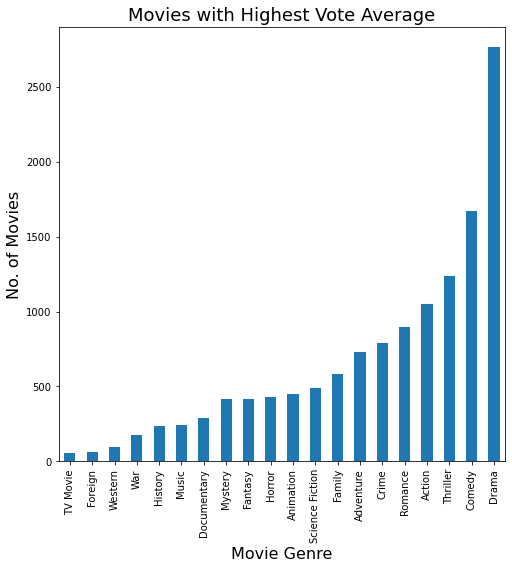

In [36]:
# getting the highest vote_average data and connecting them to its related movie genre
highest_vote_average = df[df.vote_average > df.vote_average.mean()]
movie_genre = get_data(highest_vote_average,'genres')
movie_genre.plot(kind='bar', figsize=(8,8))
plt.xlabel('Movie Genre', fontsize=16)
plt.ylabel('No. of Movies', fontsize=16)
plt.title('Movies with Highest Vote Average', fontsize=18)

<a id='conclusions'></a>
## Conclusions

> 1.The mean of runtime of movies is abour 103 minute.
>
> 2.The most rate of action movie Genres over years is 2014.
>
> 3.The most rate of family movie Genres over years is 2011.
>
> 4.The most rate of crime movie Genres over years was Similar are 2010, 2014 and 2015.
>
> 5.The most rate of Romance movie Genres over years is 2012.
>
> 6.The most rate of Animation movie Genres over years was Similar are 2011 and 2012.
>
> 7.The most popular movie genre is Drama and the lowest is Foreign.
>
> 8.The most profit movie genre is Drama and the lowest is TV movie.
>
> 9.The Highest Vote Average movie genre is Drama and the lowest is TV movie.

### The top 10 directors and Number of their movies are.
1. Woody Allen          42
2. Clint Eastwood       34
3. Steven Spielberg     29
4. Martin Scorsese      26
5. Ridley Scott         23
6. Steven Soderbergh    22
7. Ron Howard           22
8. Joel Schumacher      21
9. Brian De Palma       20
10. Wes Craven           19 